# Homework 5 

In your project, you will pick an image dataset to solve a classification task. Provide a link to your dataset.

## Task 1 (70 points) 

### Part 1 (20 points): 

This step involves downloading, preparing, and visualizing your dataset. Create a convolutional base using a common pattern: a stack of Conv and MaxPooling layers. Depending on the problem and the dataset you must decide what pattern you want to use (i.e., how many Conv layers and how many pooling layers). Please describe why you chose a particular pattern. Add the final dense layer(s). Compile and train the model. Report the final evaluation and describe the metrics.

Solution: 

I intend to use the CIFAR-10 dataset as it is an ideal problem to solve for an image classification task. Moreover the data consists of 60,000 images which accounts for a good amount data to test a Deep Learning model. All the images are color images and comprises of 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images. The dataset was downloaded using keras dataset library. 

For building the convolution base I'll be using a pattern of Convolution network along with poolong, hidden layer and an output layer. The reason behind using such a model is to solve complex functionalities. For getting a better output, we need to fit the model in ways too complex, so we need to use functions which can solve the non-linear complexity of the model. For convolution network I'll be using the Conv2D method where convolution takes place on 2 axis. It extends the convolution to three strata, Red, Green and Blue.

In [1]:
import numpy as np
import pandas as pd

In [2]:
## Importing all relevant libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [3]:
# Importing CIFAR-10 dataset

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
#Input vector - 32*32 shape

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

#Changing data type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
# normalizing the data 

X_train = X_train/255
X_test = X_test/255

In [10]:
n_classes = 10

Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

print("New Shape of Y_train: ", Y_train.shape)
print("New Shape of Y_test: ", Y_test.shape)

New Shape of Y_train:  (50000, 10)
New Shape of Y_test:  (10000, 10)


In [11]:
# building a linear stack of layers with the sequential model

model = Sequential()

# Building a convolutional layer

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), 
                 padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 75)        33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 125)         0

In [12]:
# compiling the sequential model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
# training the model for 10 epochs

model.fit(X_train, Y_train, batch_size=128, epochs=2, validation_data=(X_test, Y_test))

Epoch 1/2
391/391 [==============================] - 126s 321ms/step - loss: 1.5793 - accuracy: 0.4169 - val_loss: 1.2008 - val_accuracy: 0.5652
Epoch 2/2
391/391 [==============================] - 120s 308ms/step - loss: 1.0835 - accuracy: 0.6145 - val_loss: 0.9015 - val_accuracy: 0.6860


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 75)        33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 125)         0

In [15]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.9015 - accuracy: 0.6860


[0.9014859199523926, 0.6859999895095825]

The metrics used is the accuracy score and the accuracy of the model after 2 epchs is coming out to be ~60%. I ran the model with upto 20 epochs but their was'nt any significant improvement and hence I kept it to just 2 epochs.

### Part 2 (25 points): The following models are widely used for transfer learning because of their performance and architectural innovations:

1. VGG (e.g., VGG16 or VGG19).
2. GoogLeNet (e.g., InceptionV3).
3. Residual Network (e.g., ResNet50).
4. MobileNet (e.g., MobileNetV2)

Choose any one of the above models to perform the classification task you did in Part 1. Evaluate the results using the same metrics as in Part 1. Are there any differences? Why or why not?

In [16]:
from tensorflow.keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, input_shape= (32, 32, 3), weights= 'imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [17]:
from tensorflow.keras.utils import to_categorical

# extract train and val features

vgg_features_train = pretrained_model.predict(X_train)
vgg_features_val = pretrained_model.predict(X_test)

In [18]:
vgg_features_train.shape

(50000, 1, 1, 512)

In [19]:
from tensorflow.keras.layers import BatchNormalization

model2 = Sequential()

model2.add(Flatten(input_shape=(1, 1, 512)))
model2.add(Dense( 128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

#compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

# train model using features generated from VGG16 model
model2.fit(vgg_features_train, Y_train, epochs=20, batch_size=128, validation_data=(vgg_features_val, Y_test))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 67,466
Trainable params: 67,210
Non-trainable params: 256
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 1s 2ms/step - loss: 1.6570 - accuracy: 0.4274 - val_loss: 1.

I used the VGG-16 pretrained model to to solve the image classification task. However, the accuracy just increased by a fraction. I believe that more complex level fine-tuning and hyperparameters tuning may be required to pre-train the model to further increase accuracy. 

### Part 3 (25 points): 

Use data augmentation to increase the diversity of your dataset by applying random transformations such as image rotation (you can use any other technique as well). Repeat the process from part 1 with this augmented data. Did you observe any difference in results?

In [20]:
#Using ImageDataGenerator to augment the original dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_train = ImageDataGenerator( rotation_range=2, horizontal_flip=True, width_shift_range=0.1, 
                                    height_shift_range=0.1, zoom_range=0.1)

augmented_test = ImageDataGenerator( rotation_range=2, horizontal_flip=True, width_shift_range=0.1, 
                                    height_shift_range=0.1, zoom_range=0.1)


In [21]:
augmented_train.fit(X_train)
augmented_test.fit(X_test)

In [22]:
# building a linear stack of layers with the sequential model

model3 = Sequential()

# Building a convolutional layer

model3.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), 
                 padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model3.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

# flatten output of conv
model3.add(Flatten())

# hidden layer
model3.add(Dense(500, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(250, activation='relu'))
model3.add(Dropout(0.3))

# output layer
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 75)        33825     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 75)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 125)        

In [23]:
# compiling the sequential model

model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [24]:
# training the model for 10 epochs

model3.fit_generator((augmented_train.flow(X_train, Y_train, batch_size=128)), epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


391/391 [==============================] - 121s 309ms/step - loss: 1.7251 - accuracy: 0.3615 - val_loss: 1.3012 - val_accuracy: 0.5263
Epoch 2/10
391/391 [==============================] - 122s 312ms/step - loss: 1.3359 - accuracy: 0.5214 - val_loss: 1.0631 - val_accuracy: 0.6304
Epoch 3/10
391/391 [==============================] - 124s 317ms/step - loss: 1.1602 - accuracy: 0.5867 - val_loss: 0.9610 - val_accuracy: 0.6565
Epoch 4/10
391/391 [==============================] - 120s 306ms/step - loss: 1.0634 - accuracy: 0.6277 - val_loss: 0.8713 - val_accuracy: 0.6944
Epoch 5/10
391/391 [==============================] - 128s 326ms/step - loss: 0.9970 - accuracy: 0.6517 - val_loss: 0.8083 - val_accuracy: 0.7178
Epoch 6/10
391/391 [==============================] - 121s 309ms/step - loss: 0.9503 - accuracy: 0.6660 - val_loss: 0.8217 - val_accuracy: 0.7092
Epoch 7/10
391/391 [==============================] - 120s 308ms/step - loss: 0.9089 - accuracy: 0.6816 - val_loss: 0.7610 - val_accura

As part of the data augmentation I performed image rotation, horizontal_flip, width_shift, height_shift and a zoom function. I used ImageDataGenerator from keras.preprocessing.image library. The metrics used is accuarcy and validation score. The accuracy after implementing the data augmentation increased from ~59% to 72% which is a significant improvement.

# Task 2 (30 points):

### Part 1 (15 points): 

Variational Autoencoder (VAE): Here is a complete implementation of a VAE in TensorFlow: 
https://www.tensorflow.org/tutorials/generative/cvae
 
Projects in Machine Learning and AI (RPI Fall 2021)
Following these steps try generating images using the same encoder-decoder architecture using a different Image dataset (other than MNIST).

Performing VAE for CIFAR-10 dataset

In [25]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time
from tensorflow.keras import layers, Input
from tensorflow.keras import backend as K

In [26]:
from tensorflow.keras.datasets import cifar10

(train_images, _), (test_images, _) = cifar10.load_data()

trying to run model from link of prof

In [27]:
# n_classes = 10

# Y_train = to_categorical(y_train, n_classes)
# Y_test = to_categorical(y_test, n_classes)

# print("New Shape of Y_train: ", Y_train.shape)
# print("New Shape of Y_test: ", Y_test.shape)

In [28]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 32, 32, 3)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [29]:
train_size = 50000
batch_size = 32
test_size = 10000

In [30]:
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

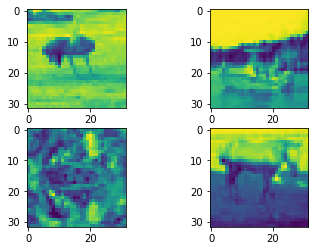

In [31]:
#View a few images
plt.figure(1)
plt.subplot(221)
plt.imshow(X_train[42][:,:,0])

plt.subplot(222)
plt.imshow(X_train[240][:,:,0])

plt.subplot(223)
plt.imshow(X_train[200][:,:,0])

plt.subplot(224)
plt.imshow(X_train[2000][:,:,0])
plt.show()

In [32]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential()(
        [
            tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )
    


    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=8*8*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(8, 8, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

In [33]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [34]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 10

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

Consider rewriting this model with the Functional API.


In [35]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0])
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [36]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

In [37]:
# generate_and_save_images(model, 0, test_sample)

# for epoch in range(1, epochs + 1):
#   start_time = time.time()
#   for train_x in train_dataset:
#     train_step(model, train_x, optimizer)
#   end_time = time.time()

#   loss = tf.keras.metrics.Mean()
#   for test_x in test_dataset:
#     loss(compute_loss(model, test_x))
#   elbo = -loss.result()
#   display.clear_output(wait=False)
#   print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
#         .format(epoch, elbo, end_time - start_time))
#   generate_and_save_images(model, epoch, test_sample)

In [38]:
def plot_latent_images(model, n, digit_size=32):
  """Plots n x n digit images decoded from the latent space."""

  norm = tfp.distributions.Normal(0, 1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z = np.array([[xi, yi]])
      x_decoded = model.sample(z)
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  plt.axis('Off')
  plt.show()

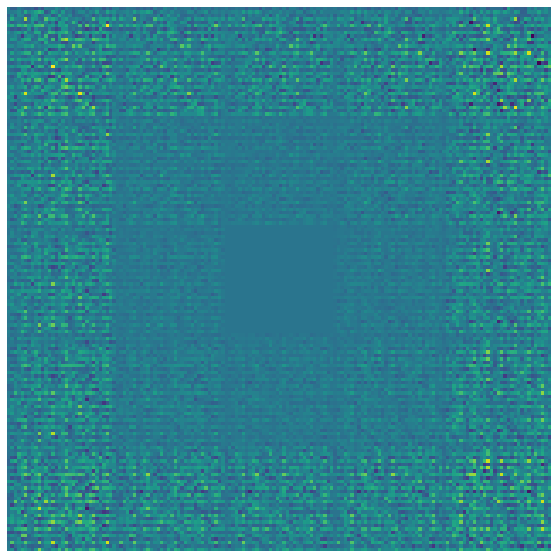

In [39]:
plot_latent_images(model, 5)

I implemented a vanilla VAEs model using the CIFAR dataset. The autoencoder and decoder worked well for training the model, however the output is a very blurred set of images. This may be because of the reconstruction loss caused by the decoder. After readiung few articles I came to know that vanilla VAE usually creates a blurred images and hence it is always a good option to use Deep feature consistent(DCF) VAE.
Refer to this link: https://www.arxiv-vanity.com/papers/1705.07202/

### Part 2 (15 points): 

Generative Adversarial Networks (GANs): Repeat part 1 (use same dataset) and implement a GAN model to generate high 
quality synthetic images. You may follow steps outlined here: https://www.tensorflow.org/tutorials/generative/dcgan

In [61]:
import tensorflow as tf

In [62]:
tf.__version__

'2.5.1'

In [67]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [69]:
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()

In [123]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [124]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

In [125]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [131]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 8, 8, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 32, 32, 3)

    return model

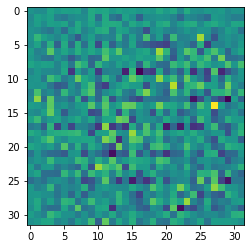

In [132]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

In [135]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [136]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00083297]], shape=(1, 1), dtype=float32)


In [137]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [138]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [139]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [140]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [141]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [161]:
EPOCHS = 10
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [162]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [163]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [164]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

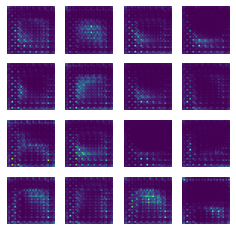

In [165]:
train(train_dataset, EPOCHS)

In [166]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [167]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

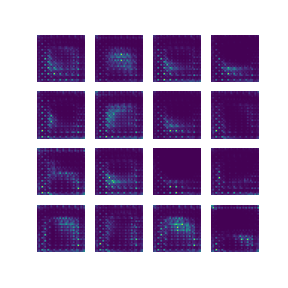

In [168]:
display_image(EPOCHS)

In [169]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


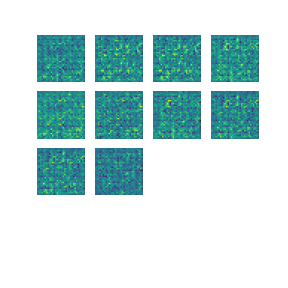

In [170]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

The above implemented model is performaed using the official documentation provided by Tensorflow. Calling  the train() function trains the generator and discriminator simultaneously.
Again the generated images consists of lot of noise and this is because ideally tensorflow recommends to perfrom at least 50 epochs, however due to lack of processing power I could only perform 10 epochs.

### Task 3 (100 points)-Only for Graduate Students:

This part of homework 5 is focused on reinforcement learning (RL) and is due on November 12th (11:59 pm).

#### Task 3.1(20 points):  We discussed how we can formulate RL problems as an MDP. Describe any real-world application that can be formulated as an MDP. Describe what the state space, action space, transition model, and reward are. You do not ne ed to be precise in the description of the transition model and reward (no formula is needed). Qualitative description is enough.



In a Reinforcement Learning problem, we usually have a learner and a decision maker which are called agent and the surrounding with which it interacts is called the environment. The environment, in return, provides rewards and a new state based on the actions of the agent. So, in reinforcement learning, we do not teach an agent how it should do something but presents it with rewards whether positive or negative based on its actions. 

So, in an MDP, an agent interacts with an environment by taking actions and seek to maximize the rewards the agent gets from the environment. At any given time stamp t, the process is as follows:

1. The environment is in state St
2. The agent takes an action At
3. The environment generates a reward Rt based on St and At
4. The environment moves to the next state St+1

The goal of this agent is to increase and maximize the total rewards (ΣRt) gathered over a period of time. The agent needs to find best possible action on a given state that will maximize the total reward. The probability distribution of taking actions At from a state St is called policy π(At | St). The goal of solving an MDP is to find the optimal policy.

To express a problem using MDP, one needs to define the followings:

1. states of the environment
2. actions the agent can take on each state
3. rewards obtained after taking an action on a given state
4. state transition probabilities.


I studied multiple examples but found this medium article with an example to fish salmons which I found really interesting and easy to explain:

#### Real World Example:  Whether to fish salmons this year

In this example the proportion of salmons are decided which can be catched in a year provided it maximizes the reward. Each salmon is considered to generate a fixed amount of dollar. But if a large proportion of salmons are caught then the yield of the next year will reduce which is the penalty. 

We need to find the optimum portion of salmons to catch to maximize the return over a long time period.

The problem is then simplified to whether to fish a certain portion of salmon or not. This problem can be expressed as an MDP as follows

States: The number of salmons available in that area in that year. 

For simplicity it is assumed that there are only 4 states; empty, low, medium, high. The four states are defined as follows

Empty -> no salmons are available; 
low -> available number of salmons are below a certain threshold t1; 
medium -> available number of salmons are between t1 and t2; 
high -> available number of salmons are more than t2

Actions: 2 actions are assumed; fish and not_to_fish.

Rewards: Fishing at certain state generates following rewards: 
Low, medium and high are $5K, $50K and $100k respectively. 

State Transitions: Fishing in a state has higher a probability to move to a state with lower number of salmons. Not_to_fish action has higher probability to move to a state with higher number of salmons 

Now, there are two kinds of nodes considered:
Large circles are state nodes, small solid black circles are action nodes. 
Once an action is taken the environment responds with a reward and transitions to the next state. 

Each arrow shows the <transition probability, reward>. 

For example, a Medium action node Fish has 2 arrows transitioning to 2 different states; i) Low with (probability=0.75, reward=$10K) or ii) back to Medium with (probability=0.25, reward=$10K). 
In the state Empty, the only action is Re-breed which transitions to the state Low with (probability=1, reward=-$200K).

https://miro.medium.com/max/1400/1*6q1Lyrm7VRkBJitaUIc0DA.png![image.png](attachment:image.png)


#### Task 3.2 (30 points): RL is used in various sectors - Healthcare, recommender systems and trading are a few of those. Pick one of the three areas. Explain one of the problems in any of these domains that can be more effectively solved by reinforcement learning. Find an open-source project (if any) that has addressed this problem. Explain this project in detail.



 USING REINFORCEMENT LEARNING FOR MEDICAL IMAGE THRESHOLDING

I chose the example of image Thresholding which talks image processing techniques.

In several applications, due to non-optimal circumstances like noise, non-uniform illumination etc., optimal results cannot be achieved. This particular paper in its solution proposes to solve the problem by designing and implementing a reinforcement learning agent. 

Here, the agent will learn the optimal threshold for an image through interactions with an experienced user,or integrating objective domain knowledge. The agent will discover which actions give the maximum reward based on a predefmed reward and punishment function. This reward/punishment can be objective or subjective. This method is a general approach to image thresholding.

To separate the object gray levels go from the background gray levels, we need to determine a proper threshold T. Optimal thresholds can usually he extracted 60m bimodal histograms.

The reinforcement learning agent is designed based on characteristics of the problem. The most important concepts of reinforcement learning agent are state ob- servation, taking appropriate actions, and receiving re- wards.

The interaction of user with the agent in this method is based on using a GUI. By using this GUI the agent can talk with an experienced operator. The agent takes samples 60M as a set of test images and thresholds them. The proposed agent uses 50 different states defined based on following parameter.

Further, Q-learning algoriyhm is used. The Q-matrix, the matrix of accumulated reward, is implemented based on the actions and the states to find out maximum probability of taking each action according to Boltanan policy.

The agent modifies the initial threshold by taking an action. A total number of 20 actions have been defined for this purpose.

Reward and Punishment:

The reinforcement agent receives two types of reward and punishment, objective and subjective. In subjective case they will receive the reward and punishment directly from the user. This task is done by interaction with agent through the GUI. The user will be asked whether the result of the thresholding is "bad, "fair" or "good". The user will choose one of these options to give reward and punishment based on hisher experience.

The algorithm was implemented in MatLab where in objective case the user determines the number of objects, the numher of holes, an estimate of object area and tolerance for area deviation. The user also defines the number of iteration, and the values. A typical initial value for temperature was 100.

Citation: M. Shokri and H. R. Tizhoosh, "Using reinforcement learning for image thresholding," CCECE 2003 - Canadian Conference on Electrical and Computer Engineering. Toward a Caring and Humane Technology (Cat. No.03CH37436), 2003, pp. 1231-1234 vol.2, doi: 10.1109/CCECE.2003.1226121.

### Task 3.3 (50 points): Implement the game of tic-tac-toe (write a class that implements an agent playing Tic Tac Toe and learning its Q function) using the Q-learning technique (see the resource provided in class for more details). Clearly describe your evaluation metric and demonstrate a few runs. You might need to use some online resources to proceed on this. Do not forget to cite those.



I used the following website to thoroughly understand the implementation of the game TIC TAC TOE and re-implemented using similar process: https://techvidvan.com/tutorials/python-game-project-tic-tac-toe/

In [171]:
import pygame as pg,sys
from pygame.locals import *
import time


#initialize global variables
XO = 'x'
winner = None
draw = False
width = 400
height = 400
white = (255, 255, 255)
line_color = (10,10,10)

#TicTacToe 3x3 board
board = [[None]*3,[None]*3,[None]*3]

pygame 2.0.3 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [172]:
#initializing pygame window
pg.init()
fps = 60
CLOCK = pg.time.Clock()
screen = pg.display.set_mode((width, height+100),0,32)
pg.display.set_caption("Tic Tac Toe")

In [173]:
#loading the images
opening = pg.image.load('/Users/devanshoojain/RPI_Sem_2/Projects_in_AI_ML/Homeworks/Homework_5/tic-tac-toe-python-project/tic tac opening.png')
x_img = pg.image.load('/Users/devanshoojain/RPI_Sem_2/Projects_in_AI_ML/Homeworks/Homework_5/tic-tac-toe-python-project/x.png')
o_img = pg.image.load('/Users/devanshoojain/RPI_Sem_2/Projects_in_AI_ML/Homeworks/Homework_5/tic-tac-toe-python-project/o.png')

#resizing images
x_img = pg.transform.scale(x_img, (80,80))
o_img = pg.transform.scale(o_img, (80,80))
opening = pg.transform.scale(opening, (width, height+100))

In [174]:
def game_opening():
    screen.blit(opening,(0,0))
    pg.display.update()
    time.sleep(1)
    screen.fill(white)

    # Drawing vertical lines
    pg.draw.line(screen,line_color,(width/3,0),(width/3, height),7)
    pg.draw.line(screen,line_color,(width/3*2,0),(width/3*2, height),7)
    # Drawing horizontal lines
    pg.draw.line(screen,line_color,(0,height/3),(width, height/3),7)
    pg.draw.line(screen,line_color,(0,height/3*2),(width, height/3*2),7)
    draw_status()

In [175]:
def draw_status():
    global draw

    if winner is None:
        message = XO.upper() + "'s Turn"
    else:
        message = winner.upper() + " won!"
    if draw:
        message = 'Game Draw!'

    font = pg.font.Font(None, 30)
    text = font.render(message, 1, (255, 255, 255))

    # copy the rendered message onto the board
    screen.fill ((0, 0, 0), (0, 400, 500, 100))
    text_rect = text.get_rect(center=(width/2, 500-50))
    screen.blit(text, text_rect)
    pg.display.update()

In [176]:
def check_win():
    global board, winner, draw

    # check for winning rows
    for row in range (0,3):
        if ((board [row][0] == board[row][1] == board[row][2]) and(board [row][0] is not None)):
            # this row won
            winner = board[row][0]
            pg.draw.line(screen, (250,0,0), (0, (row + 1)*height/3 -height/6),\
                              (width, (row + 1)*height/3 - height/6 ), 4)
            break

    # check for winning columns
    for col in range (0, 3):
        if (board[0][col] == board[1][col] == board[2][col]) and (board[0][col] is not None):
            # this column won
            winner = board[0][col]
            #draw winning line
            pg.draw.line (screen, (250,0,0),((col + 1)* width/3 - width/6, 0),\
                          ((col + 1)* width/3 - width/6, height), 4)
            break

    # check for diagonal winners
    if (board[0][0] == board[1][1] == board[2][2]) and (board[0][0] is not None):
        # game won diagonally left to right
        winner = TTT[0][0]
        pg.draw.line (screen, (250,70,70), (50, 50), (350, 350), 4)

    if (board[0][2] == board[1][1] == board[2][0]) and (board[0][2] is not None):
        # game won diagonally right to left
        winner = board[0][2]
        pg.draw.line (screen, (250,70,70), (350, 50), (50, 350), 4)

    if(all([all(row) for row in board]) and winner is None ):
        draw = True
    draw_status()

In [177]:
def drawXO(row,col):
    global board, XO
    if row==1:
        posx = 30
    if row==2:
        posx = width/3 + 30
    if row==3:
        posx = width/3*2 + 30

    if col==1:
        posy = 30
    if col==2:
        posy = height/3 + 30
    if col==3:
        posy = height/3*2 + 30
    board[row-1][col-1] = XO
    if(XO == 'x'):
        screen.blit(x_img,(posy,posx))
        XO= 'o'
    else:
        screen.blit(o_img,(posy,posx))
        XO= 'x'
    pg.display.update()
    #print(posx,posy)
    #print(TTT)

In [178]:
def userClick():
    #get coordinates of mouse click
    x, y = pg.mouse.get_pos()

    #get column of mouse click (1-3)
    if(x<width/3):
        col = 1
    elif (x<width/3*2):
        col = 2
    elif(x<width):
        col = 3
    else:
        col = None

    #get row of mouse click (1-3)
    if(y<height/3):
        row = 1
    elif (y<height/3*2):
        row = 2
    elif(y<height):
        row = 3
    else:
        row = None
    #print(row,col)

    if(row and col and board[row-1][col-1] is None):
        global XO

        #draw the x or o on screen
        drawXO(row,col)
        check_win()

In [179]:
def reset_game():
    global board, winner,XO, draw
    time.sleep(3)
    XO = 'x'
    draw = False
    game_opening()
    winner=None
    board = [[None]*3,[None]*3,[None]*3]

In [ ]:
game_opening()

# run the game loop forever
while(True):
    for event in pg.event.get():
        if event.type == QUIT:
            pg.quit()
            sys.exit()
        elif event.type == MOUSEBUTTONDOWN:
            # the user clicked; place an X or O
            userClick()
            if(winner or draw):
                reset_game()

    pg.display.update()
    CLOCK.tick(fps)

References:
    
    1. https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf
    2. https://www.tensorflow.org/tutorials/generative/dcgan
    3. https://techvidvan.com/tutorials/python-game-project-tic-tac-toe/
    4. https://www.tensorflow.org/tutorials/generative/cvae
    